In [16]:
import pandas as pd

In [17]:
from sklearn.datasets import load_iris

In [18]:
iris = load_iris()

In [19]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [20]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
df['target'] = iris.target

In [22]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
df['flower_name'] = df.target.apply(lambda x : iris.target_names[x])

In [24]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [52]:
X = df.drop(columns=["target","flower_name"])
Y = df[["target"]]

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [54]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [55]:
x_pre = num_pipe.fit_transform(X)

In [56]:
x_pre

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
model = KNeighborsClassifier(n_neighbors=5)

In [59]:
model

KNeighborsClassifier()

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,Y , test_size=0.2,random_state=42)

In [62]:
model.fit(xtrain,ytrain)

c:\Users\ASUS\Documents\ML practicals\repository\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [63]:
model.score(xtrain,ytrain)

0.9583333333333334

In [64]:
model.score(xtest,ytest)

1.0

In [65]:
preds = model.predict(xtest)
preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [66]:
ytest.head(15)

,target
73,1
18,0
118,2
78,1
76,1
31,0
64,1
141,2
68,1
82,1


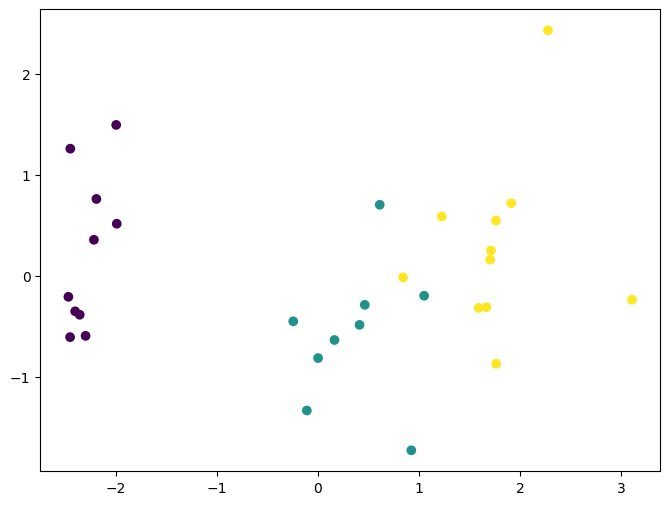

In [73]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(xtest)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=preds)